In [69]:
import os
import sys
from pathlib import Path

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
from larval_gonad.notebook import Nb
from larval_gonad.plotting import make_figs, TSNEPlot
from larval_gonad.config import memory

# Setup notebook
nbconfig = Nb.setup_notebook(seurat_dir='../output/scrnaseq_combine_force')

last updated: 2018-05-10 
Git hash: 24131ab928c3728f9d1a9a7071609d227c96d379


In [5]:
norm = nbconfig.seurat.get_normalized_read_counts()

In [9]:
clusters = nbconfig.seurat.get_clusters()['res.0.4']
clusters.name = 'cluster'

In [11]:
tsne = nbconfig.seurat.get_tsne()

In [15]:
norm.head()

,rep1_AAACCTGAGACAAGCC,rep1_AAACCTGAGCTTATCG,rep1_AAACCTGGTGTAATGA,rep1_AAACCTGGTTCATGGT,rep1_AAACCTGTCCCTCTTT,rep1_AAACGGGAGACTGGGT,rep1_AAACGGGCACAGTCGC,rep1_AAACGGGGTCGCGTGT,rep1_AAACGGGGTGTTAAGA,rep1_AAACGGGTCGTCCAGG,...,rep3_TTTGTCACAGTCACTA,rep3_TTTGTCACATTTCAGG,rep3_TTTGTCAGTACATGTC,rep3_TTTGTCAGTACCCAAT,rep3_TTTGTCAGTGGACGAT,rep3_TTTGTCATCATAAAGG,rep3_TTTGTCATCATGGTCA,rep3_TTTGTCATCCCTTGTG,rep3_TTTGTCATCTCCGGTT,rep3_TTTGTCATCTTGCAAG
FBgn,,,,,,,,,,,,,,,,,,,,,
FBgn0031081,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
FBgn0031085,0.0,0.0,0.0,1.426850,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.864632,0.0,0.0,2.012912,1.763174,2.255463,2.687754,0.0,0.000000
FBgn0040784,0.0,0.0,0.0,1.748911,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.226923,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,2.223977
FBgn0031086,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
FBgn0031082,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [65]:
def _plot(gene, ax=None):
    greys = sns.color_palette('Greys')
    reds = sns.color_palette('Reds')
    reds[0] = greys[1]
    
    if ax is None:
        fig, ax = plt.subplots()

    _dat = tsne.join(clusters).join(norm.T[nbconfig.symbol2fbgn[gene]])
    TSNEPlot(data=_dat, hue=nbconfig.symbol2fbgn[gene], palette=reds, cbar=False, ax=ax, alpha=0.6)
    ax.set_aspect('equal')
    ax.set_title(gene)

In [66]:
genes = [
    'nht',
    'can',
    'aly',
    'fzo',
    'wa-cup',
    'betaTub85D',
    'Mst33A',
    'c-cup',
    'soti',
    'sowi',
    'dj',
]

In [67]:
len(genes)

11

bob


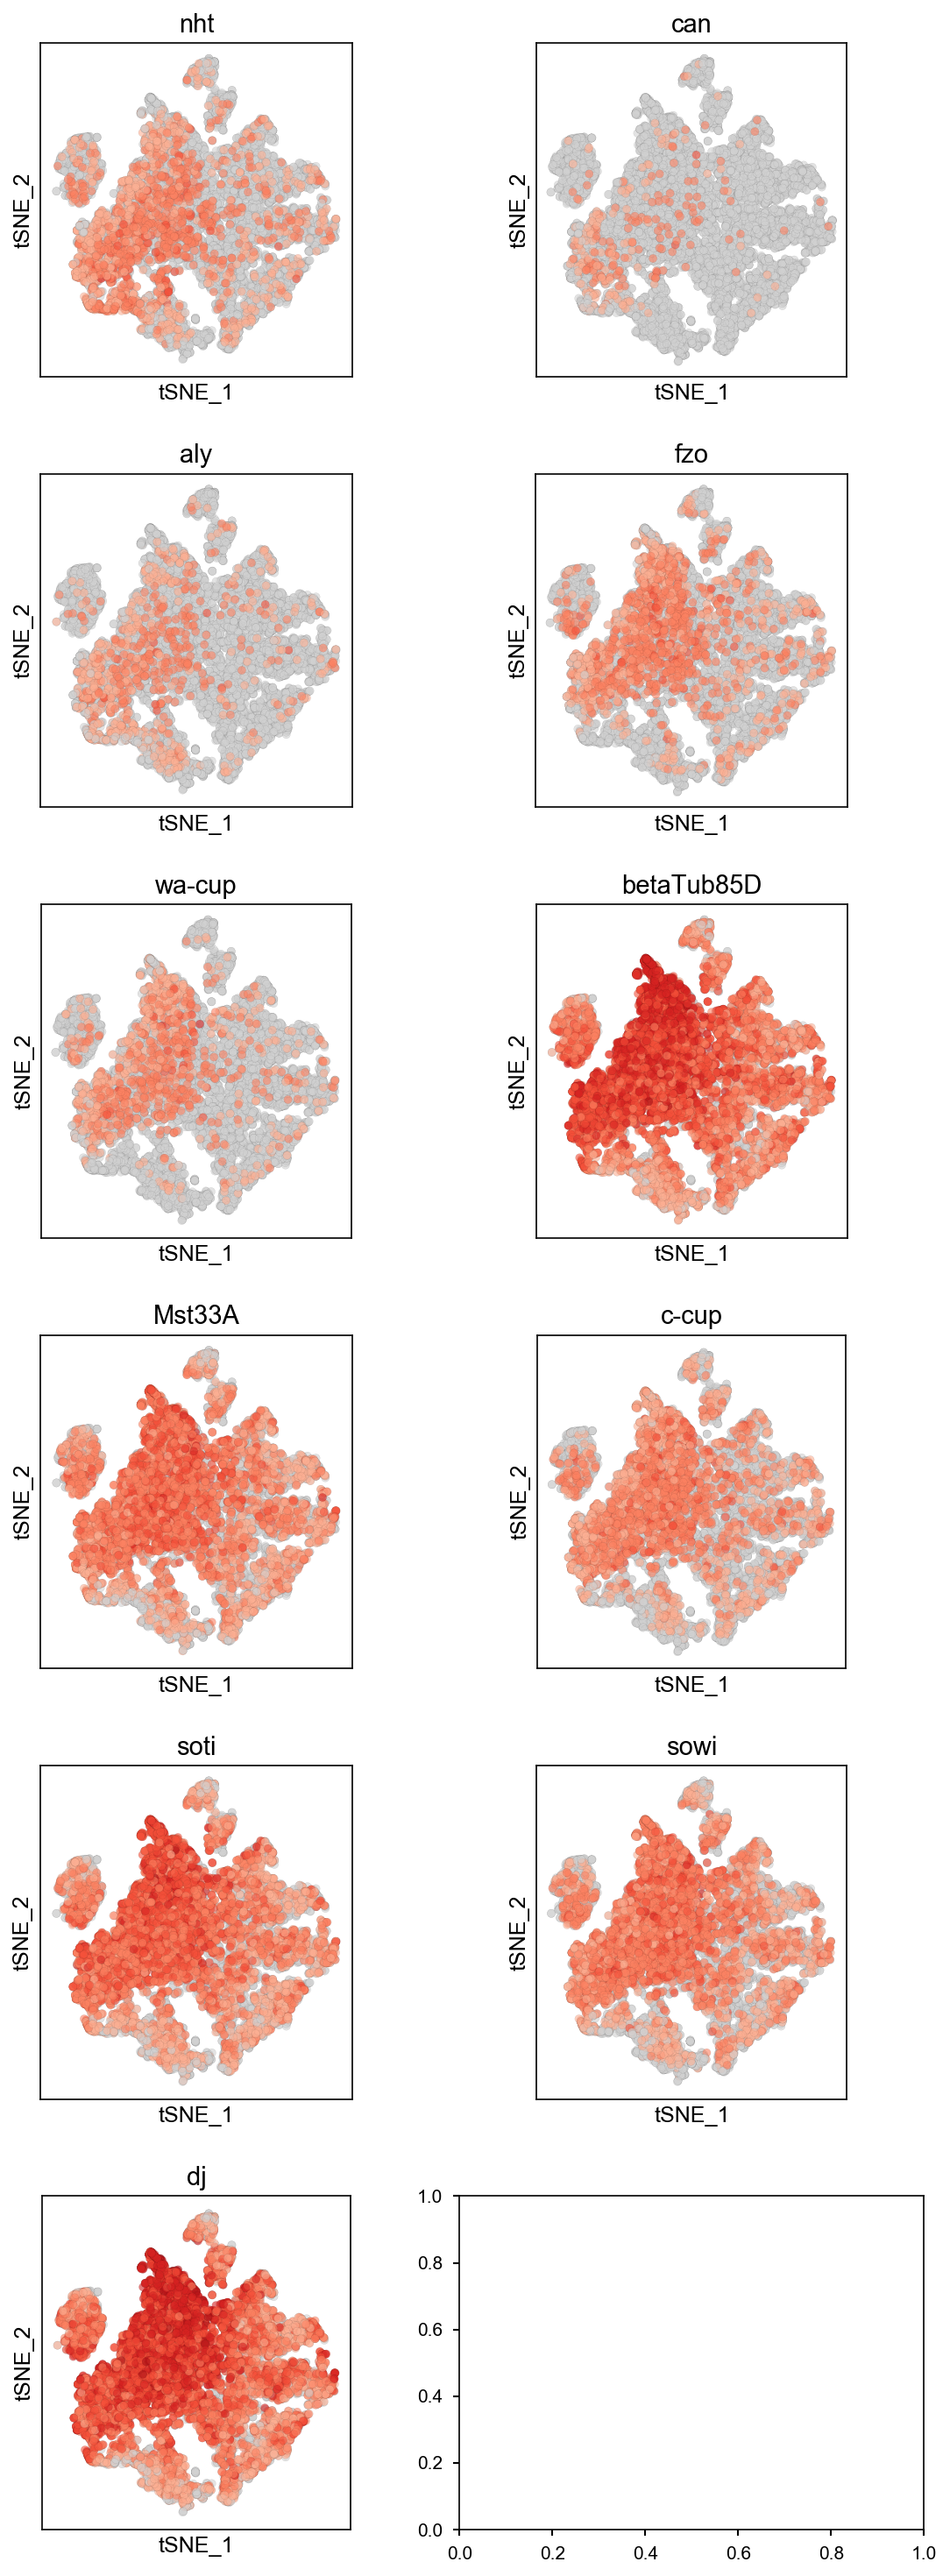

In [71]:
fig, axes = plt.subplots(6, 2, figsize=(8, 20))

for g, ax in zip(genes, axes.flatten()):
    _plot(g, ax)
    
plt.tight_layout()
print('bob')